⚠️ Archivo local no encontrado. Descargando de internet (esto tardará un poco)...
💾 Guardando copia en tu ordenador para el futuro...
Datos listos.


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


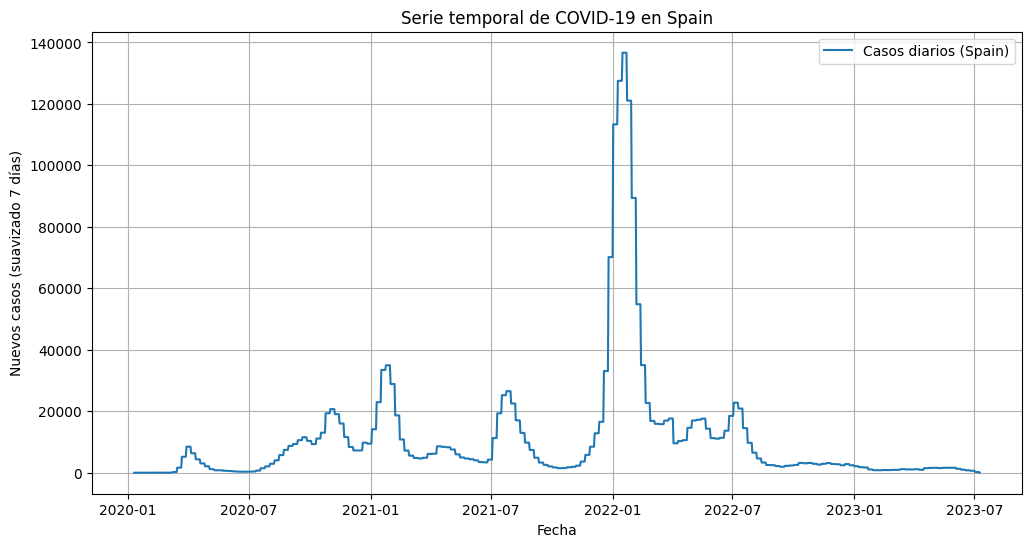

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os  

# Configuración
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
nombre_archivo_local = "owid-covid-data.csv"

# --- LÓGICA DE CACHÉ ---
if os.path.exists(nombre_archivo_local):
    print(f"✅ Archivo local '{nombre_archivo_local}' encontrado. Cargando rápido...")
    df = pd.read_csv(nombre_archivo_local)
else:
    print(f"⚠️ Archivo local no encontrado. Descargando de internet (esto tardará un poco)...")
    df = pd.read_csv(url)
    
    print("💾 Guardando copia en tu ordenador para el futuro...")
    # index=False evita que se guarde una columna extra con el número de fila
    df.to_csv(nombre_archivo_local, index=False) 

# --- LIMPIEZA Y VISUALIZACIÓN (Igual que antes) ---

# Convertir fecha
df['date'] = pd.to_datetime(df['date'])

print("Datos listos.")
# Si usas Jupyter, display() queda mejor, si es script normal usa print(df.head())
try:
    display(df.head())
except:
    print(df.head())

# FILTRADO Y GRÁFICO
pais = "Spain" 
df_pais = df[df['location'] == pais]

plt.figure(figsize=(12, 6))
plt.plot(df_pais['date'], df_pais['new_cases_smoothed'], label=f'Casos diarios ({pais})')
plt.title(f"Serie temporal de COVID-19 en {pais}")
plt.xlabel("Fecha")
plt.ylabel("Nuevos casos (suavizado 7 días)")
plt.legend()
plt.grid(True)
plt.show()